In [1]:
# Loading Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hacktest/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv
/kaggle/input/hacktrain/hacktrain.csv


In [2]:
# Loading Training Dataset
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

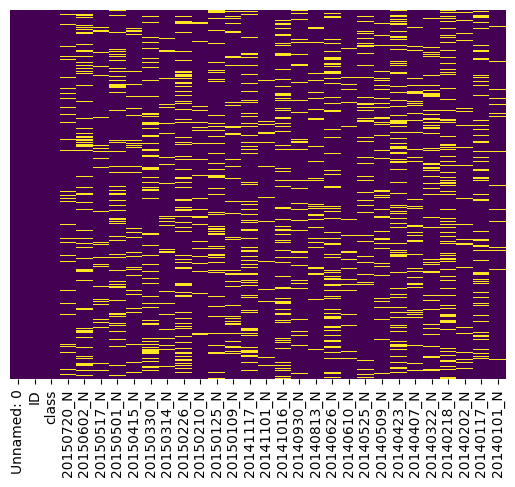

In [4]:
# Visualizing missing values for features
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [5]:
# Outlier Handling and Imputing 
X = df.drop(columns=['Unnamed: 0', 'ID', 'class'])
y = df['class']

def cap_outliers_iqr(df):
    capped_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        capped_df[col] = np.clip(df[col], lower, upper)
    return capped_df

X = cap_outliers_iqr(X)

imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
df = pd.concat([df[['Unnamed: 0', 'ID']], X, y], axis=1)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/co

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class
0,0,1,637.5950,658.6680,-1882.0300,-1924.36,997.9040,-1739.990000,630.0870,149.5344,...,-1043.160,-1942.4900,267.138,596.2918,450.6566,211.328,3752.225,-1180.1900,433.906,water
1,1,2,634.2400,593.7050,-1625.7900,-1672.32,914.1980,-692.386000,707.6260,-1670.5900,...,-933.934,-625.3850,120.059,364.8580,476.9720,220.878,3752.225,-1360.5600,524.075,water
2,3,4,58.0174,-1599.1600,144.9534,-1052.63,507.2934,-1564.630000,-893.6636,729.7900,...,368.622,-1302.0872,-1227.800,304.6210,310.5116,369.214,3752.225,-194.0048,-1343.550,water
3,4,5,72.5180,-1111.1074,380.4360,-1256.93,515.8050,-1413.180000,-802.9420,683.2540,...,155.624,-1286.0328,-924.073,432.1500,282.8330,298.320,3752.225,-194.0048,-826.727,water
4,7,8,1136.4400,1212.9792,-115.5438,1647.83,1935.8000,662.009592,2158.9800,30.5414,...,1959.430,-279.3170,-384.915,-113.4060,1020.7200,1660.650,3752.225,-568.0500,-1357.140,water


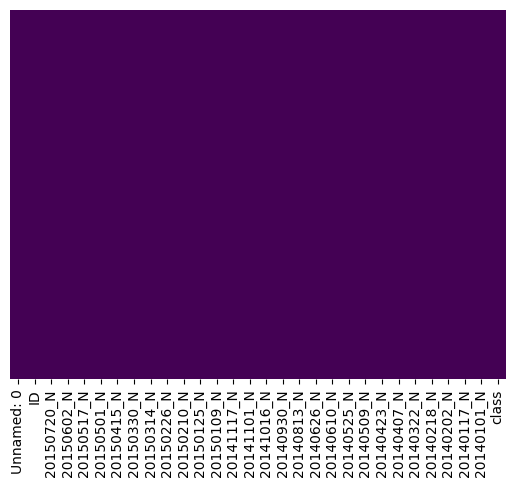

In [6]:
# Visualising missing values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [7]:
# Encoding categorical data
df.drop(['ID', 'Unnamed: 0'], axis = 1, inplace = True)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
df.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class
0,637.5950,658.6680,-1882.0300,-1924.36,997.9040,-1739.990000,630.0870,149.5344,-1325.64,-944.0840,...,-1043.160,-1942.4900,267.138,596.2918,450.6566,211.328,3752.225,-1180.1900,433.906,5
1,634.2400,593.7050,-1625.7900,-1672.32,914.1980,-692.386000,707.6260,-1670.5900,-1408.64,-989.2850,...,-933.934,-625.3850,120.059,364.8580,476.9720,220.878,3752.225,-1360.5600,524.075,5
2,58.0174,-1599.1600,144.9534,-1052.63,507.2934,-1564.630000,-893.6636,729.7900,-3162.14,-1206.3824,...,368.622,-1302.0872,-1227.800,304.6210,310.5116,369.214,3752.225,-194.0048,-1343.550,5
3,72.5180,-1111.1074,380.4360,-1256.93,515.8050,-1413.180000,-802.9420,683.2540,-2829.40,-1267.5400,...,155.624,-1286.0328,-924.073,432.1500,282.8330,298.320,3752.225,-194.0048,-826.727,5
4,1136.4400,1212.9792,-115.5438,1647.83,1935.8000,662.009592,2158.9800,30.5414,1242.87,-2646.0500,...,1959.430,-279.3170,-384.915,-113.4060,1020.7200,1660.650,3752.225,-568.0500,-1357.140,5


In [8]:
# Defining feature and target variables
X = df.drop('class', axis = 1)
y = df['class']

In [9]:
# Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000)

In [10]:
# Scaling Train and Test data separately
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train_scaled = X_train_scaled.clip(lower=-1, upper=1)
df = pd.concat([X_train_scaled, y], axis=1)
X_train_scaled

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.549793,1.000000,1.000000,0.628194,1.000000,0.520480,-0.710029,0.756658,1.000000,1.000000,...,0.127085,-0.774010,-0.195314,-1.000000,1.000000,-0.209048,1.000000,0.759197,1.000000,-0.514184
1,-1.000000,-0.865477,-0.250912,0.425457,-0.910061,1.000000,-0.834881,-1.000000,-0.588849,0.930004,...,-0.908441,-1.000000,-0.643553,0.416630,-0.867464,-0.901152,-0.623496,0.455020,-0.595305,-0.322648
2,0.664746,-1.000000,0.813317,1.000000,-0.891961,-1.000000,-1.000000,-0.433873,-1.000000,-1.000000,...,-1.000000,1.000000,-0.803892,0.790938,-0.856539,0.924752,-0.792154,0.470099,-0.958312,-0.742594
3,0.590343,0.807508,0.404100,0.714523,1.000000,0.308949,1.000000,-0.006443,1.000000,0.313122,...,-1.000000,0.928799,-0.981887,-0.106004,-0.285685,-0.728136,-0.554577,0.814328,-0.400461,0.762192
4,0.213159,-0.338795,-0.866379,1.000000,-0.201062,-0.025380,-0.989710,-0.177848,0.289209,0.692824,...,1.000000,-1.000000,0.304288,-0.355856,-0.703721,-0.528561,-0.551223,0.158675,-0.700773,-0.117428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,1.000000,-1.000000,-0.855523,1.000000,-0.628540,-0.561499,1.000000,-1.000000,-1.000000,0.618122,...,-0.269957,1.000000,-0.807725,-0.056427,1.000000,-0.661229,0.449206,0.812023,-0.925653,-0.711758
6396,-0.286101,-1.000000,-0.812522,-1.000000,0.606117,-0.761910,0.732211,0.141521,-0.150322,-1.000000,...,-1.000000,-0.269293,-0.332965,-0.439379,-0.044815,-0.791256,-0.606727,-0.884667,0.812894,0.376549
6397,0.718617,1.000000,0.452831,0.062151,1.000000,-1.000000,-0.142248,-1.000000,0.491334,0.299958,...,1.000000,1.000000,0.319855,1.000000,0.626485,-0.630384,1.000000,0.070437,0.984652,0.239774
6398,-0.682540,0.922038,0.977801,0.577288,1.000000,0.426033,1.000000,0.884937,0.929334,0.747508,...,1.000000,1.000000,-0.377708,-1.000000,1.000000,0.412886,1.000000,0.439655,1.000000,1.000000


In [11]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
X_test_scaled = X_test_scaled.clip(lower=-1, upper=1)
df = pd.concat([X_test_scaled, y], axis=1)
X_test_scaled

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.834782,0.919785,-0.439741,-0.276701,0.984525,0.609965,-0.803014,-0.473442,1.000000,0.852475,...,-1.000000,0.869399,-0.590678,1.000000,1.000000,1.000000,1.000000,0.455654,1.000000,1.000000
1,0.914741,0.931280,0.157785,0.635035,1.000000,0.788627,-0.154075,0.938465,1.000000,0.869770,...,0.942124,-0.399804,-0.165735,-1.000000,1.000000,-0.865755,0.073081,1.000000,1.000000,1.000000
2,0.597829,1.000000,0.965892,1.000000,1.000000,-0.589929,1.000000,1.000000,0.267153,0.775593,...,0.919546,1.000000,0.075876,-0.597895,-0.283900,1.000000,-0.132044,-1.000000,-0.008933,1.000000
3,0.119129,-1.000000,-1.000000,-0.826664,-0.787941,-0.620453,1.000000,0.970418,-0.794389,0.813425,...,-1.000000,-0.864130,0.468670,0.493872,0.111313,0.017945,-0.576773,0.885576,-0.709990,-0.246127
4,0.858830,-1.000000,-1.000000,-0.397004,-0.952753,-1.000000,-1.000000,-0.763187,-1.000000,-1.000000,...,0.122994,-1.000000,-0.196602,-0.791101,-0.441693,-0.863477,-0.829974,0.819073,-0.870139,-0.537166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.451342,1.000000,-0.507131,-0.439736,-0.451655,1.000000,-0.270875,-0.016718,-0.088030,-1.000000,...,0.722695,0.317300,0.549458,1.000000,1.000000,-0.815560,-0.707759,-0.110222,0.793682,-0.384312
1596,0.735542,1.000000,1.000000,1.000000,1.000000,1.000000,-0.810219,0.473405,0.963524,0.889800,...,1.000000,-1.000000,0.139260,1.000000,1.000000,0.218932,-0.433043,0.758150,1.000000,-0.527829
1597,-1.000000,-1.000000,-0.699898,-1.000000,-0.940177,-1.000000,-0.761624,-1.000000,-0.790700,-0.877530,...,-0.609001,-0.625143,-0.045953,-0.872818,0.257279,-0.877145,-0.489324,-1.000000,-0.166727,0.380553
1598,0.764938,1.000000,-1.000000,0.878654,1.000000,1.000000,1.000000,-0.309784,1.000000,0.664874,...,1.000000,0.795527,-0.756849,1.000000,1.000000,-0.840262,0.613864,0.918411,1.000000,-0.811191


In [12]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [13]:
# Model score on testing subset
model.score(X_test_scaled, y_test)

0.906875

In [14]:
# Model Coefficients
model.coef_

array([[-0.60754898, -0.43379715, -0.49608906, -0.13217854,  0.40894198,
         0.59085877,  0.54288359,  0.43445714,  0.11592689, -0.87848328,
         0.21235755, -0.18940032,  0.01204072, -0.56733675,  0.35242201,
        -0.24419474,  0.34276059, -0.04830664,  0.02638983,  0.38350481,
         0.51559029,  0.43882373,  0.16089003, -0.47872551,  0.03560277,
        -0.38558346, -0.03975032],
       [ 0.65116963,  0.54198553,  0.46321096,  0.22258915,  0.38393894,
         0.14830823, -0.23645724,  0.30303729, -0.25750672,  0.77751539,
         0.23729202, -0.84765654, -0.67347854,  0.18818328, -0.20001898,
         0.12575078, -0.15585038,  0.61361642,  0.07383453, -0.61778221,
        -0.17247086,  0.00576834,  0.39289568,  0.78663884,  1.05012965,
        -0.17350004, -0.43959521],
       [ 0.17210368,  0.123374  ,  0.00903475, -0.07271564, -0.09165501,
         0.26238601,  0.63219181, -0.1907038 ,  0.23851079,  0.25012489,
         0.18518598, -0.04349865, -0.07135016,  2.4862

In [15]:
# Model intercepts for each class
model.intercept_

array([ 1.67134411,  4.75038295, -0.21140856, -0.81956402, -2.17687622,
       -3.21387825])

In [16]:
# Confusion matrix for predicted values
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_pred, y_test))

[[ 107   21    0    7    0    2]
 [  52 1199   15    7    6    1]
 [   2    3   15    1    0    0]
 [   5    8    9  119    0    7]
 [   1    0    0    0    0    0]
 [   1    1    0    0    0   11]]


In [17]:
# Classification Report
print(classification_report(y_pred, y_test, labels=list(range(len(label_encoder.classes_))), target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        farm       0.64      0.78      0.70       137
      forest       0.97      0.94      0.95      1280
       grass       0.38      0.71      0.50        21
  impervious       0.89      0.80      0.84       148
     orchard       0.00      0.00      0.00         1
       water       0.52      0.85      0.65        13

    accuracy                           0.91      1600
   macro avg       0.57      0.68      0.61      1600
weighted avg       0.92      0.91      0.91      1600



In [18]:
# Loading Testing Dataset
test_data = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_data.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [19]:
# Storing IDs separately for setting index of predictions later
ids = test_data['ID']# Evaluating shape of Test Data
test_data.shape

(2845, 29)

In [20]:
# Dropping ID Column
test_data.drop(['ID', 'Unnamed: 0'], axis = 1, inplace = True)
test_data.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [21]:
# Removing Outliers, Imputing and Scaling Test Data
test_data = cap_outliers_iqr(test_data)
test_data_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)
test_data_scaled = pd.DataFrame(scaler.transform(test_data_imputed), columns=test_data.columns)
test_data_scaled = test_data_scaled.clip(lower=-1, upper=1)
test_data_scaled.head()

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.732630,-1.000000,0.480189,0.155039,-0.916720,-0.383851,-0.066503,0.671019,-0.543071,0.515074,...,-1.000000,-1.000000,0.859790,1.000000,-0.842497,-0.020659,-0.737281,-1.000000,-0.879354,1.000000
1,0.628903,0.420566,-1.000000,0.345822,-0.502836,0.684087,-0.312932,-1.000000,1.000000,0.576210,...,0.164010,0.627809,1.000000,0.906594,1.000000,-0.633013,0.482081,0.354697,-0.675738,-0.704684
2,0.714080,0.761138,-1.000000,0.895226,-0.780430,1.000000,-1.000000,-1.000000,0.953248,0.272901,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-0.400106,0.001521,0.343888,-0.690460,-0.709084
3,0.576788,-1.000000,0.673852,0.493765,-0.925310,0.863022,-0.678430,0.736663,-0.776950,-1.000000,...,-1.000000,0.933758,-0.985773,1.000000,-0.720690,-0.862729,-0.402946,0.191221,-0.782568,1.000000
4,0.756471,1.000000,-1.000000,1.000000,-0.729036,1.000000,0.366844,-1.000000,1.000000,0.979765,...,0.933675,1.000000,1.000000,0.766454,1.000000,-0.557851,0.475845,1.000000,-0.333614,-0.500447


In [22]:
# Predicting Test Data
y_test = model.predict(test_data_scaled)
y_test

array([0, 1, 4, ..., 3, 3, 3])

In [23]:
# Decoding Encoded Predictions
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['farm', 'forest', 'orchard', ..., 'impervious', 'impervious',
       'impervious'], dtype=object)

In [24]:
# Formatting Prediction sinto Pandas DataFrame
result = pd.DataFrame({'class': y_decoded}).reset_index()
result = pd.concat([ids, result], axis = 1)
result = result.drop(columns = ['index'])
result.head()

,ID,class
0,1,farm
1,2,forest
2,3,orchard
3,4,forest
4,5,forest


In [25]:
# Formatting Predictions into csv format
result.to_csv("submission.csv", index=False) 